In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import os
import pathlib
import cv2
import PIL.Image
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
ds=pathlib.Path(r"C:\Users\Sandy\.keras\datasets\flower_photos")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen=ImageDataGenerator(rotation_range=30, brightness_range=(0.2, 0.1), zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255)

In [ ]:
test_gen=ImageDataGenerator(rescale=1./255)

In [ ]:
RESIZE=(224, 224)

In [ ]:
train=train_gen.flow_from_directory(r"C:\Users\Sandy\.keras\datasets\flower_photos\train", target_size=RESIZE,
        color_mode="rgb",class_mode='categorical')

Found 3670 images belonging to 5 classes.


In [ ]:
test=test_gen.flow_from_directory(r"C:\Users\Sandy\.keras\datasets\flower_photos\test", target_size=RESIZE,
        color_mode="rgb",class_mode='categorical', shuffle=False)

Found 100 images belonging to 5 classes.


In [ ]:
train.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
test.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
y_train=train.classes

In [ ]:
len(y_train)

3670

In [ ]:
y_test=test.classes

In [ ]:
len(y_test)

100

In [ ]:
train.num_classes

5

In [ ]:
INPUT=train.image_shape
INPUT

(224, 224, 3)

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_detector_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [ ]:
model=Sequential()

model.add(feature_detector_layer)

model.add(Dense(units=5, activation='softmax'))

model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping, History
import datetime

stop=EarlyStopping('val_loss', mode='min', patience=2, verbose=1) #early stopping

history = History() #history

# log_dir = "C:\\Users\\Sandy\\.keras\datasets\\flower_photos\\logs" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") #tensorboard
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.fit(train, epochs=20, callbacks=[stop, history], validation_data=test)

Epoch 1/20
115/115 [==============================] - 532s 4s/step - loss: 0.9378 - accuracy: 0.6338 - val_loss: 0.7751 - val_accuracy: 0.6800
Epoch 2/20
115/115 [==============================] - 455s 4s/step - loss: 0.5848 - accuracy: 0.7804 - val_loss: 0.5325 - val_accuracy: 0.7600
Epoch 3/20
115/115 [==============================] - 590s 5s/step - loss: 0.5132 - accuracy: 0.8106 - val_loss: 0.4615 - val_accuracy: 0.8800
Epoch 4/20
115/115 [==============================] - 497s 4s/step - loss: 0.4773 - accuracy: 0.8243 - val_loss: 0.3992 - val_accuracy: 0.8200
Epoch 5/20
115/115 [==============================] - 544s 5s/step - loss: 0.4649 - accuracy: 0.8335 - val_loss: 0.4127 - val_accuracy: 0.8500
Epoch 6/20
115/115 [==============================] - 422s 4s/step - loss: 0.4219 - accuracy: 0.8447 - val_loss: 0.3538 - val_accuracy: 0.8900
Epoch 7/20
115/115 [==============================] - 549s 5s/step - loss: 0.4129 - accuracy: 0.8548 - val_loss: 0.3457 - val_accuracy: 0.8600

<AxesSubplot:>

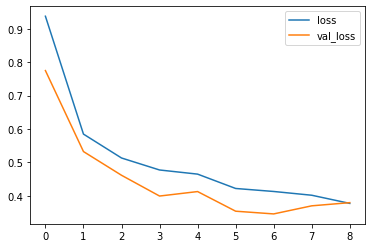

In [ ]:
metrics=pd.DataFrame(model.history.history)
metrics[['loss', 'val_loss']].plot()

In [ ]:
model.evaluate(test)

4/4 [==============================] - 9s 2s/step - loss: 0.3795 - accuracy: 0.8400


[0.3794509470462799, 0.8399999737739563]

In [ ]:
y_pred=model.predict(test)

In [ ]:
real_pred=[]
for i in range(len(y_pred+1)):
    real_pred.append(np.argmax(y_pred[i]))

In [ ]:
real_pred=np.array(real_pred)
real_pred
train.class_indices

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
label={0:'daisy', 1:'dandelion', 2:'roses', 3:'sunflowers', 4:'tulips'}

In [ ]:
test.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
len(real_pred)

100

In [ ]:
real_pred_lab=[]
for p in real_pred:
    real_pred_lab.append(label[p])

In [ ]:
y_pred[0]

array([3.4718670e-02, 8.8412242e-05, 2.3981960e-07, 9.6518642e-01,
       6.3701264e-06], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test.classes, real_pred)

array([[20,  0,  0,  0,  0],
       [ 1, 14,  0,  4,  1],
       [ 0,  0, 17,  0,  3],
       [ 1,  1,  0, 17,  1],
       [ 3,  0,  1,  0, 16]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test.classes, real_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        20
           1       0.93      0.70      0.80        20
           2       0.94      0.85      0.89        20
           3       0.81      0.85      0.83        20
           4       0.76      0.80      0.78        20

    accuracy                           0.84       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.84      0.84       100



In [ ]:
def predict(url, resize, true_labels):
    img_arr=plt.imread(url)
    img=cv2.resize(img_arr, resize)
    plt.axis('off')
    plt.imshow(img_arr)
    img=np.expand_dims(img, axis=0)
    prediction=true_labels[np.argmax(model.predict(img))]
    return f"======> {prediction.upper()} <======"

'======> TULIPS <======'

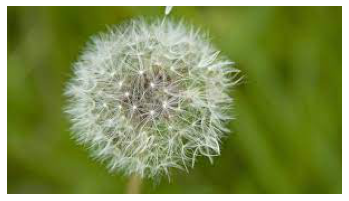

In [ ]:
predict(r"C:\Users\Sandy\Desktop\download_1.jpg", (224, 224), label)

In [ ]:
tf.keras.models.save_model(model, r"C:\Users\Sandy\Downloads\Train_Models", overwrite=True, include_optimizer=True, save_format="tf")

INFO:tensorflow:Assets written to: C:\Users\Sandy\Downloads\Train_Models\assets


INFO:tensorflow:Assets written to: C:\Users\Sandy\Downloads\Train_Models\assets


In [ ]:
model=tf.keras.models.load_model(r"C:\Users\Sandy\Downloads\Train_Models")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_7 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
